In [57]:
import math
import random
import pandas as pd
import numpy as np
import scipy.special
from string import ascii_letters

from scipy.stats.kde import gaussian_kde

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, r2_score, accuracy_score

import matplotlib.pyplot as plt
import matplotlib as mpl

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import seaborn as sns

from bokeh.charts import Histogram, output_file, show
from bokeh.io import output_notebook



In [58]:
output_notebook()
%matplotlib inline

print __version__ 
init_notebook_mode(connected=True)

Loading BokehJS ...

2.1.0


# Step 3 

In [59]:
#read in data
df = pd.read_csv(r'https://github.com/bgweber/StarCraftMining/raw/master/data/scmPvT_Protoss_Mid.csv', skiprows=1, header=None, names = ['ProtossPylon','ProtossSecondPylon','ProtossFirstGas','ProtossSecondGas','ProtossFirstExpansion','ProtossSecondExpansion','ProtossThirdExpansion','ProtossFourthExpansion','ProtossGateway','ProtossSecondGatway','ProtossThirdGatway','ProtossFourthGatway','ProtossCore','ProtossZealot','ProtossGoon','ProtossRange','ProtossForge',
'ProtossCannon','ProtossGroundWeapons1','ProtossGroundArmor1','ProtossShields1','ProtossGroundWeapons2','ProtossGroundArmor2','ProtossShields2','ProtossCitadel','ProtossLegs','ProtossArchives','ProtossTemplar','ProtossArchon','ProtossStorm','ProtossDarkTemplar','ProtossDarkArchon','ProtossMaelstorm','ProtossRoboBay','ProtossShuttle','ProtossShuttleSpeed','ProtossRoboSupport','ProtossReavor','ProtossReavorDamage','ProtossReavorCapacity','ProtossObservory','ProtossObs',
'ProtossStargate','ProtossCorsair','ProtossDisruptionWeb','ProtossFleetBeason','ProtossCarrier','ProtossCarrierCapacity','ProtossTribunal',
'ProtossArbitor','ProtossStatis','ProtossRecall','ProtossAirWeapons1','ProtossAirArmor1','ProtossAirWeapons2','ProtossAirArmor2','midBuild'])

#Full data sett 100% as matrix
targetDataframe = df.iloc[:,:-1].as_matrix()
dataFrame = df.as_matrix()
name = df.columns.values


df = df[['ProtossPylon','ProtossSecondPylon','ProtossFirstGas','ProtossSecondGas','ProtossFirstExpansion','ProtossSecondExpansion','ProtossThirdExpansion','ProtossFourthExpansion','ProtossGateway','ProtossSecondGatway','ProtossThirdGatway','ProtossFourthGatway','ProtossCore','ProtossZealot','ProtossGoon','ProtossRange','ProtossForge',
'ProtossCannon','ProtossGroundWeapons1','ProtossGroundArmor1','ProtossShields1','ProtossGroundWeapons2','ProtossCitadel','ProtossLegs','ProtossArchives','ProtossTemplar','ProtossArchon','ProtossStorm','ProtossDarkTemplar','ProtossRoboBay','ProtossShuttle','ProtossReavor','ProtossObservory','ProtossObs',
'ProtossStargate','ProtossCarrier','ProtossCarrierCapacity','ProtossAirWeapons1','ProtossAirArmor1','midBuild']]

names = ['ProtossPylon','ProtossSecondPylon','ProtossFirstGas','ProtossSecondGas','ProtossFirstExpansion','ProtossSecondExpansion','ProtossThirdExpansion','ProtossFourthExpansion','ProtossGateway','ProtossSecondGatway','ProtossThirdGatway','ProtossFourthGatway','ProtossCore','ProtossZealot','ProtossGoon','ProtossRange','ProtossForge',
'ProtossCannon','ProtossGroundWeapons1','ProtossGroundArmor1','ProtossShields1','ProtossGroundWeapons2','ProtossCitadel','ProtossLegs','ProtossArchives','ProtossTemplar','ProtossArchon','ProtossStorm','ProtossDarkTemplar','ProtossRoboBay','ProtossShuttle','ProtossReavor','ProtossObservory','ProtossObs',
'ProtossStargate','ProtossCarrier','ProtossCarrierCapacity','ProtossAirWeapons1','ProtossAirArmor1']


droppedAttributes = ['ProtossDisruptionWeb','ProtossReavorCapacity','ProtossReavorDamage'
,'ProtossCorsair','ProtossAirWeapons2','ProtossGroundArmor2','ProtossAirArmor2','ProtossDarkArchon'
,'ProtossMaelstorm','ProtossShields2','ProtossFleetBeason''ProtossTribunal','ProtossArbitor','ProtossStatis'
,'ProtossRecall','ProtossRoboSupport','ProtossShuttleSpeed']


# Distribution of 2 most important attributes and then replacing outliers with mean

In [60]:
p = Histogram(df["ProtossReavor"])
show(p)
p = Histogram(df["ProtossGroundArmor1"])
show(p)

for col in range(1,39):
    m = df.iloc[:,col].dropna().quantile(0.97)
    df.iloc[:,col]=df.iloc[:,col].map(lambda x: None if x>m else x)

#drop outliers
dfDropped =df.fillna(df.mean())

'''
Bokeh Distribution graph to justify how our data looks
'''



'\nBokeh Distribution graph to justify how our data looks\n'

# Distribution of 2 most important features after replacing outliers with mean

In [61]:
p = Histogram(dfDropped["ProtossReavor"])
show(p)
p = Histogram(dfDropped["ProtossGroundArmor1"])
show(p)

# Categorical Scatterplot using Seaborn

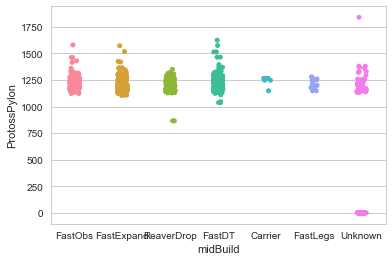

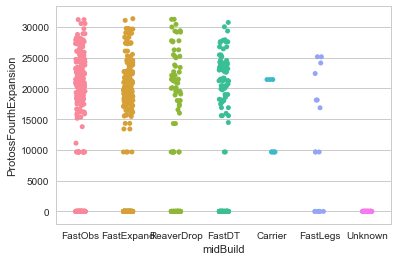

In [62]:
'''
Categorical Scatterplot using Seaborn
'''
sns.set(style="whitegrid", color_codes=True)
sns.stripplot(x="midBuild", y="ProtossPylon", data=dfDropped, jitter=True)
plt.show()

sns.stripplot(x="midBuild", y="ProtossFourthExpansion", data=dfDropped, jitter=True)
plt.show()

# Use 80% of data for build and test accuracy with other 20%

In [63]:
#build data 80%
build_data = dfDropped[:518]
build_data_labels = build_data['midBuild']
build_data = build_data.iloc[:,:-1]

In [64]:
# #build data 80%
# build_data = dfDropped.sample(frac=.8)
# build_data_labels = build_data['midBuild']
# build_data = build_data.iloc[:,:-1]
'''
The code above takes a random 80% for our test data, which makes it inconsistent for what features are being considered the most important
'''
#test data rest 20%
test_data = dfDropped.loc[~dfDropped.index.isin(build_data.index)]
test_data_labels = test_data['midBuild']
test_data = test_data.iloc[:,:-1]


#make new data
new_data = test_data.copy(deep=True)
new_data = new_data.values.tolist()

for col in xrange(len(new_data)):
    for row in xrange(len(new_data[col])):
        tilf = random.uniform(0.99, 1.01)
        temp = new_data[col][row]
        new_data[col][row] = int(temp*tilf)



#cleaned target as matrix
targetMatrix = dfDropped['midBuild'].as_matrix()

#clean data as df
dfDropped = dfDropped.iloc[:,:-1]
dfPreProsesed = preprocessing.StandardScaler().fit_transform(dfDropped)

#cleaned data as matrix
dataMatrix = dfDropped.as_matrix()


#####################################
#GradientBoostingClassifier
model_best = GradientBoostingClassifier(n_estimators=500,max_depth=2)
model_best.fit(build_data,build_data_labels)
yhat = model_best.predict(test_data)
print accuracy_score(test_data_labels, yhat)
value = model_best.feature_importances_

#GradienBoosting on new_data
newhat = model_best.predict(new_data)
print accuracy_score(test_data_labels,newhat)

0.893719806763
0.890499194847


# Take results and to see what most important features were and the % of importance each is

In [9]:
ind=sorted(range(len(value)),reverse=False,key=lambda k: value[k])
features=name[ind]
featureNames = features[:9]
featureNames = np.append(featureNames, 'All Other Features')
# featureNames.append('All Others')
value=sorted(value,reverse=False)

In [10]:
valueRest = value[:29]
value = value[30:39]
totalRest = 0.0
for num in valueRest:
    totalRest = totalRest + num
value.append(totalRest)
ind=np.array(range(10))

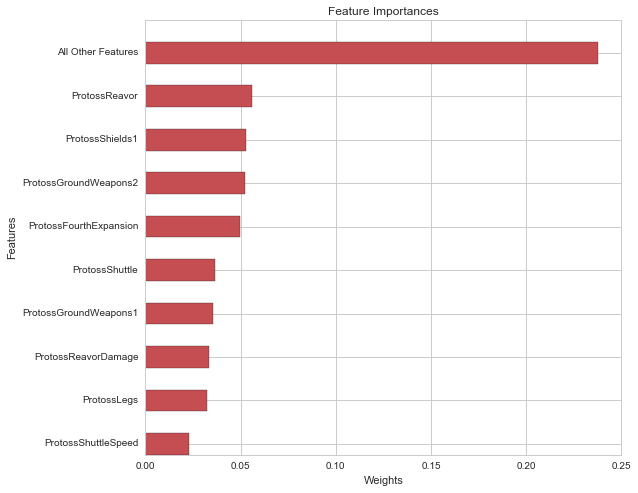

In [11]:
################################
#feature Importance
plt.rcParams['figure.figsize'] = (9,7)
plt.barh(bottom=ind,height=0.5,width=value,color='r')
plt.yticks(ind+0.25,featureNames)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [12]:
################################
# Pie chart using plotly
trace = go.Pie(labels=featureNames, values=value)
iplot([trace], filename='GB_pie_chart')
